In [62]:
import pandas as pd
from math import ceil
import numpy as np
import pydot as pt
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [63]:
# Beer rating data
data = pd.read_csv("train.csv", sep = ',')
columns = data.columns

In [64]:
data

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
5,14095,10.00,21436,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,served in a snifter; on-tap at CBC.\t\tcolor i...,"{'min': 16, 'hour': 1, 'mday': 20, 'sec': 9, '...",1324343769,NaN,NaN,NaN,NaN,perrymarcus
6,13759,12.60,10001,14,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,my 100th review on-tap! mini snifter\t\t A nut...,"{'min': 1, 'hour': 18, 'mday': 8, 'sec': 12, '...",1244484072,NaN,NaN,NaN,NaN,GratefulBeerGuy
7,3914,8.40,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,"{'min': 32, 'hour': 20, 'mday': 9, 'sec': 40, ...",1286656360,NaN,NaN,NaN,NaN,Daniellobo
8,47953,9.00,34361,394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,A snifter filled (several times over) from a 7...,"{'min': 26, 'hour': 3, 'mday': 16, 'sec': 13, ...",1279250773,NaN,NaN,NaN,Male,msubulldog25
9,7047,6.20,32676,1386,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,"Brewed with five hop additions, this alleged I...","{'min': 26, 'hour': 5, 'mday': 16, 'sec': 41, ...",1160976401,NaN,NaN,NaN,NaN,RedDiamond


In [65]:
# Define usefull data
col_indx = np.append(0, np.linspace(11, 17, 7, dtype = 'int'))
col_indx = np.append(col_indx, 2)
col_indx = np.append(col_indx, 3)

df = data.drop(columns[col_indx], axis = 1)

In [71]:
df

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/profileName
0,5.00,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,RblWthACoz
1,11.00,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,BeerSox
2,4.70,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,mschofield
3,4.40,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,molegar76
4,4.40,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,Brewbro000
5,10.00,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,perrymarcus
6,12.60,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,GratefulBeerGuy
7,8.40,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,Daniellobo
8,9.00,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,msubulldog25
9,6.20,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,RedDiamond


In [67]:
# Define a minimum amounts of rated beers per user (20 for start)
valid_user = df['user/profileName'].value_counts()[df['user/profileName'].value_counts()>20].index.values.tolist()
#valid_user

In [68]:
# Keep the original df intact
dfuser = df.copy()
dfuser.set_index('user/profileName', inplace = True)

In [69]:
# Select valid users
df_user = dfuser.loc[valid_user]

In [70]:
df_user

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste
user/profileName,,,,,,,,
northyorksammy,6.50,Founders Harvest Ale,American IPA,3.5,4.0,4.0,4.0,4.0
northyorksammy,11.00,Bearded Pat's Barleywine,American Barleywine,3.5,3.5,3.0,3.5,3.0
northyorksammy,4.00,Trafalgar Dark Wheat,American Dark Wheat Ale,4.0,3.5,3.0,2.5,3.0
northyorksammy,9.00,Founders Barrel Aged Red's Rye,Rye Beer,4.0,4.0,3.5,4.0,3.5
northyorksammy,7.00,Pike Street XXXXX Stout,American Stout,4.0,4.0,4.0,4.0,4.0
northyorksammy,5.20,Taps Rauchbier,Smoked Beer,3.5,4.0,3.0,3.0,3.5
northyorksammy,10.20,Founders Backwoods Bastard,Scotch Ale / Wee Heavy,4.0,4.0,4.0,3.5,4.0
northyorksammy,4.60,Weizen,Hefeweizen,3.5,4.0,4.0,3.5,3.5
northyorksammy,10.50,Gulden Fraug Belgian Style Ale,Belgian Strong Pale Ale,3.5,3.5,4.0,4.0,3.5


In [101]:
df_user.shape

(12061, 8)

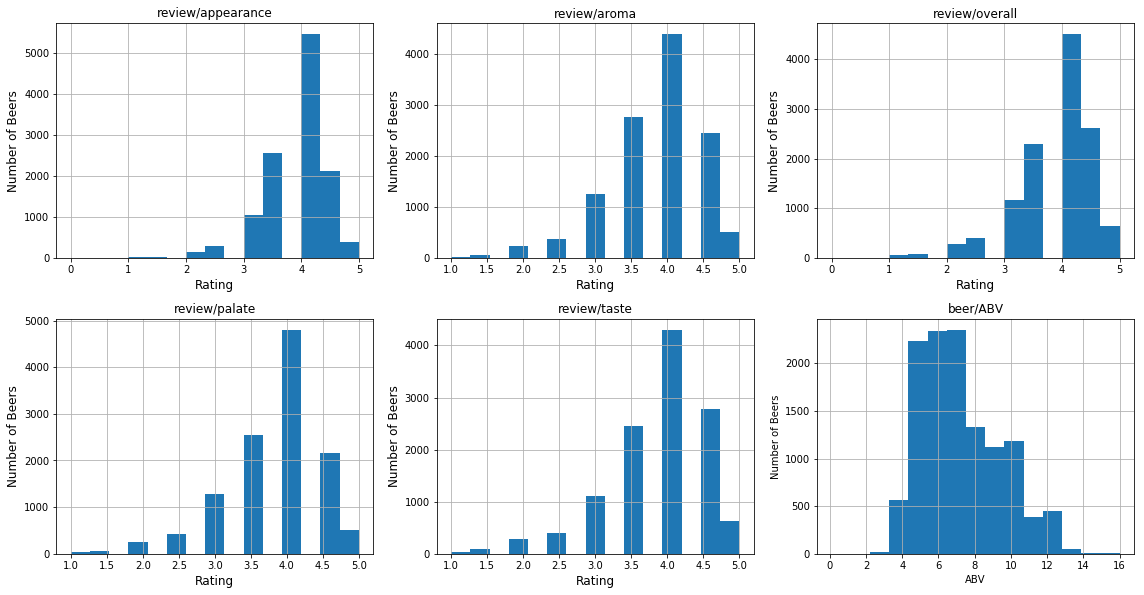

In [76]:
fig = plt.figure(figsize = (16, 12))
k = 1
for i in df_user.columns.values[np.linspace(3, 7, 5, dtype = 'int')].tolist():
    ax = fig.add_subplot(3, 3, k)
    
    plt.xlabel('Rating', fontsize = 12)
    plt.ylabel('Number of Beers', fontsize = 12)
    plt.title(i)
    
    temp_plot = df_user[i].hist(bins = 15);
    ax = plt.gca()
    k += 1
    plt.tight_layout()

ax = fig.add_subplot(3, 3, 6)
plt.xlabel('ABV')
plt.ylabel('Number of Beers')
plt.title('beer/ABV')

full_train = df_user['beer/ABV'].hist(bins = 15);
ax = plt.gca()
plt.tight_layout()

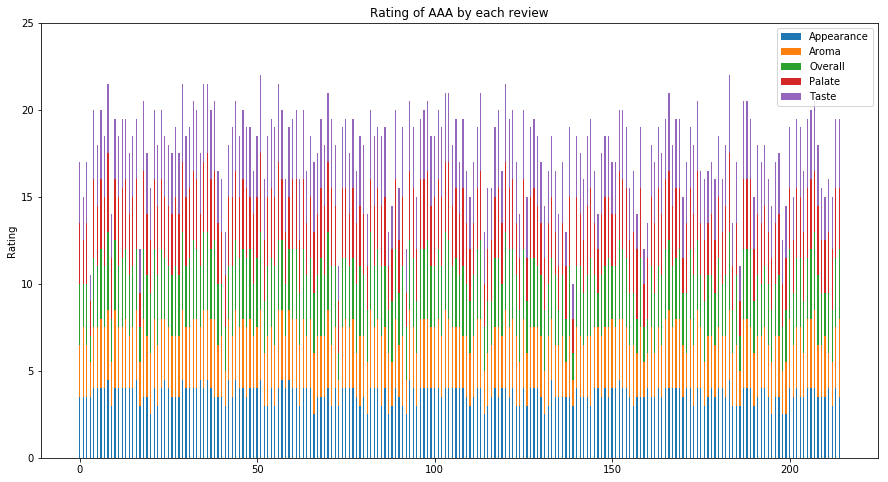

In [80]:
df_amber = df_user[df_user['beer/style'] == 'American Amber / Red Ale']

ind = range(len(df_amber))
width = 0.35  

plt.figure(figsize = (15,8))

p1 = plt.bar(ind, df_amber['review/appearance'], width)
p2 = plt.bar(ind, df_amber['review/aroma'], width, bottom = df_amber['review/appearance'])
p3 = plt.bar(ind, df_amber['review/overall'], width, bottom = df_amber['review/aroma'] + df_amber['review/appearance'])
p4 = plt.bar(ind, df_amber['review/palate'], width, bottom = df_amber['review/overall'] + df_amber['review/aroma'] + df_amber['review/appearance'])
p5 = plt.bar(ind, df_amber['review/taste'], width, bottom = df_amber['review/palate'] + df_amber['review/overall'] + df_amber['review/aroma'] + df_amber['review/appearance'])

plt.ylabel('Rating')
plt.title('Rating of AAA by each review')
plt.yticks(np.arange(0, 26, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Appearance', 'Aroma', 'Overall', 'Palate', 'Taste'))

plt.show();

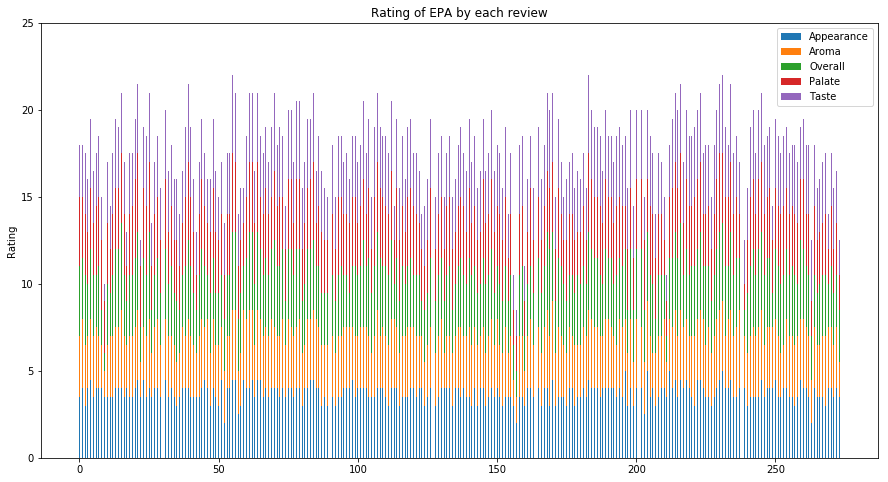

In [82]:
df_epa = df_user[df_user['beer/style'] == 'English Pale Ale']

ind = range(len(df_epa))
width = 0.35  

plt.figure(figsize = (15,8))

p1 = plt.bar(ind, df_epa['review/appearance'], width)
p2 = plt.bar(ind, df_epa['review/aroma'], width, bottom = df_epa['review/appearance'])
p3 = plt.bar(ind, df_epa['review/overall'], width, bottom = df_epa['review/aroma'] + df_epa['review/appearance'])
p4 = plt.bar(ind, df_epa['review/palate'], width, bottom = df_epa['review/overall'] + df_epa['review/aroma'] + df_epa['review/appearance'])
p5 = plt.bar(ind, df_epa['review/taste'], width, bottom = df_epa['review/palate'] + df_epa['review/overall'] + df_epa['review/aroma'] + df_epa['review/appearance'])

plt.ylabel('Rating')
plt.title('Rating of EPA by each review')
plt.yticks(np.arange(0, 26, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Appearance', 'Aroma', 'Overall', 'Palate', 'Taste'))

plt.show();

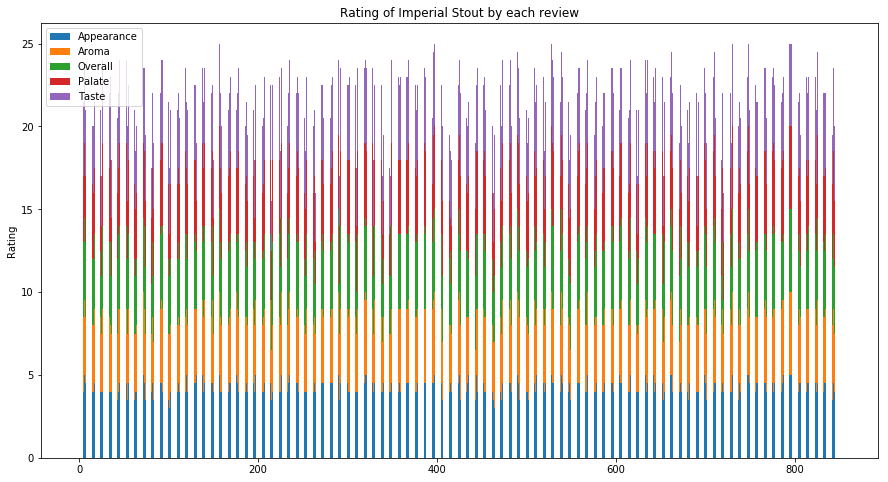

In [83]:
df_is = df_user[df_user['beer/style'] == 'American Double / Imperial Stout']

ind = range(len(df_is))
width = 0.35  

plt.figure(figsize = (15,8))

p1 = plt.bar(ind, df_is['review/appearance'], width)
p2 = plt.bar(ind, df_is['review/aroma'], width, bottom = df_is['review/appearance'])
p3 = plt.bar(ind, df_is['review/overall'], width, bottom = df_is['review/aroma'] + df_is['review/appearance'])
p4 = plt.bar(ind, df_is['review/palate'], width, bottom = df_is['review/overall'] + df_is['review/aroma'] + df_is['review/appearance'])
p5 = plt.bar(ind, df_is['review/taste'], width, bottom = df_is['review/palate'] + df_is['review/overall'] + df_is['review/aroma'] + df_is['review/appearance'])

plt.ylabel('Rating')
plt.title('Rating of Imperial Stout by each review')
plt.yticks(np.arange(0, 26, 5))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Appearance', 'Aroma', 'Overall', 'Palate', 'Taste'))

plt.show();

In [86]:
data2 = pd.read_csv("recipe.csv", sep = ',', dtype = 'a')
columns2 = data2.columns

df2 = data2[data2.columns.values[np.linspace(5, 10, 6, dtype = 'int')].tolist()].apply(pd.to_numeric)

In [85]:
data2

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.07,70,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.8,54.48,...,NaN,70,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50,1.06,1.01,6.48,17.84,...,1.05,72,NaN,Specific Gravity,All Grain,NaN,19,Sukkerlake,6-7 g sukker/l,18325
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,...,1.047,79,NaN,Specific Gravity,All Grain,1,NaN,NaN,NaN,5889
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,...,NaN,75,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051
7,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,...,1.04,70,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz,116
8,9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-...,Robust Porter,129,22.71,1.06,1.016,5.77,31.63,...,1.042,73,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz,116
9,10,Mango Habanero IPA,/homebrew/recipe/view/61082/mango-habanero-ipa,Imperial IPA,86,20.82,1.08,1.017,8.22,93.02,...,1.058,70,NaN,Specific Gravity,All Grain,NaN,21.11,Corn Sugar,4.6 oz / .66 C,NaN


In [87]:
# Values were selected considering interesting information
# OG and FG: https://www.brewersfriend.com/2009/02/04/beer-styles-original-gravity-and-final-gravity-chart/
# ABV: Less than 20º of alcohol per beer 
# For ABV and IBU: https://blog.steadyserv.com/blog/common-beer-terms/
# Size: 10 to 100 L is an interest range for the study
# Color: https://www.twobeerdudes.com/beer/srm

corrected_df2 = df2[df2['IBU']<=150]
corrected_df2 = corrected_df2[corrected_df2['OG']<=1.2]
corrected_df2 = corrected_df2[corrected_df2['OG']>1.02]
corrected_df2 = corrected_df2[corrected_df2['FG']<=1.08]
corrected_df2 = corrected_df2[corrected_df2['Size(L)']<=100]
corrected_df2 = corrected_df2[corrected_df2['Size(L)']>10]
corrected_df2 = corrected_df2[corrected_df2['ABV']<=20]
corrected_df2 = corrected_df2[corrected_df2['Color']<=100]

In [88]:
corrected_df2.describe()

,Size(L),OG,FG,ABV,IBU,Color
count,63611.000000,63611.000000,63611.000000,63611.000000,63611.000000,63611.000000
mean,24.409460,1.060406,1.013931,6.107192,41.853097,13.448548
std,11.029953,0.015454,0.004891,1.608171,27.441098,11.881561
min,10.040000,1.021000,0.991000,0.080000,0.000000,0.000000
25%,19.000000,1.050000,1.011000,5.080000,23.540000,5.220000
50%,20.820000,1.057000,1.013000,5.780000,35.730000,8.510000
75%,23.000000,1.067000,1.016000,6.800000,55.570000,16.870000
max,100.000000,1.200000,1.067000,19.930000,149.940000,95.590000


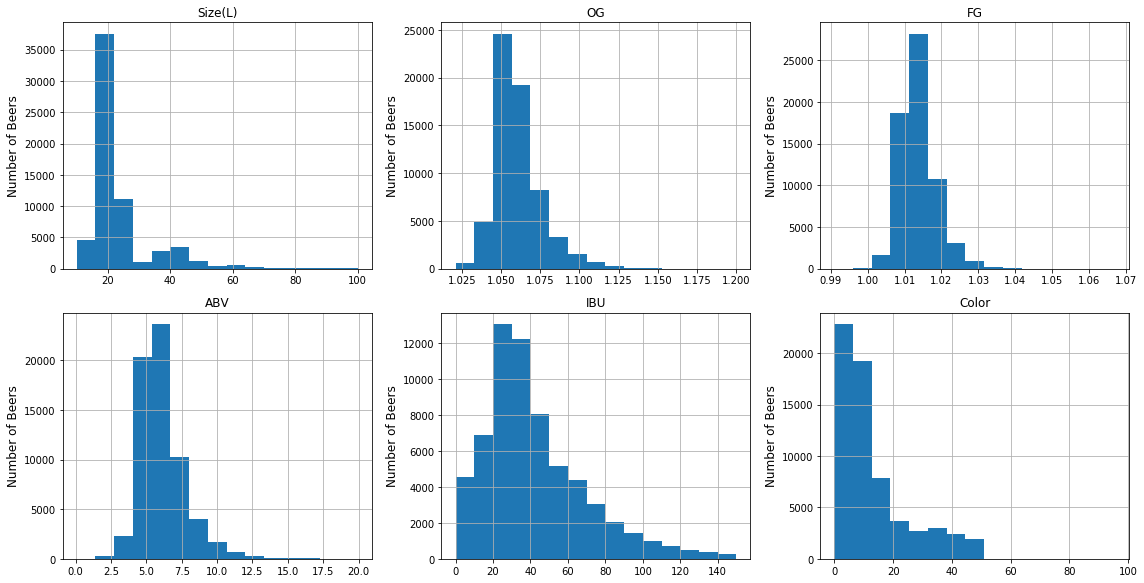

In [90]:
fig = plt.figure(figsize = (16, 12))
k = 1
for i in data2.columns.values[np.linspace(5, 10, 6, dtype = 'int')].tolist():
    ax = fig.add_subplot(3, 3, k)
    
    #plt.xlabel('Rating', fontsize = 12)
    plt.ylabel('Number of Beers', fontsize = 12)
    plt.title(i)
    
    full_train = corrected_df2[i].hist(bins = 15);
    ax = plt.gca()
    k += 1
    plt.tight_layout()

In [92]:
corrected_df2

,Size(L),OG,FG,ABV,IBU,Color
0,21.77,1.055,1.013,5.48,17.65,4.83
1,20.82,1.083,1.021,8.16,60.65,15.64
2,18.93,1.063,1.018,5.91,59.25,8.98
3,22.71,1.061,1.017,5.80,54.48,8.50
4,50.00,1.060,1.010,6.48,17.84,4.57
5,24.61,1.055,1.013,5.58,40.12,8.00
7,20.82,1.054,1.014,5.36,19.97,5.94
8,22.71,1.060,1.016,5.77,31.63,34.76
9,20.82,1.080,1.017,8.22,93.02,8.29
10,25.00,1.064,1.014,6.63,64.26,7.78


In [96]:
dfr = corrected_df2.copy()
dfr = dfr.assign(style = data2['Style'].iloc[corrected_df2.index.values.tolist()].values.tolist())
dfr = dfr.assign(name = data2['Name'].iloc[corrected_df2.index.values.tolist()].values.tolist())

In [97]:
dfr

,Size(L),OG,FG,ABV,IBU,Color,style,name
0,21.77,1.055,1.013,5.48,17.65,4.83,Cream Ale,Vanilla Cream Ale
1,20.82,1.083,1.021,8.16,60.65,15.64,Holiday/Winter Special Spiced Beer,Southern Tier Pumking clone
2,18.93,1.063,1.018,5.91,59.25,8.98,American IPA,Zombie Dust Clone - EXTRACT
3,22.71,1.061,1.017,5.80,54.48,8.50,American IPA,Zombie Dust Clone - ALL GRAIN
4,50.00,1.060,1.010,6.48,17.84,4.57,Belgian Blond Ale,Bakke Brygg Belgisk Blonde 50 l
5,24.61,1.055,1.013,5.58,40.12,8.00,American Pale Ale,Sierra Nevada Pale Ale Clone
7,20.82,1.054,1.014,5.36,19.97,5.94,Cream Ale,Spotted Clown (New Glarus Spotted Cow clone)
8,22.71,1.060,1.016,5.77,31.63,34.76,Robust Porter,Chocolate Vanilla Porter
9,20.82,1.080,1.017,8.22,93.02,8.29,Imperial IPA,Mango Habanero IPA
10,25.00,1.064,1.014,6.63,64.26,7.78,American IPA,Bakke Brygg HveteIPA 25 L


In [100]:
dfr.shape

(63611, 8)

In [126]:
common_beer = []

for beer in df_user['beer/name'].unique():
    if beer in dfr['name'].values:
        common_beer.append(beer)

print('There are {} beers out of {} in both datasets'.format(len(common_beer), len(df_user['beer/name'].unique())))

There are 101 beers out of 1320 in both datasets


In [131]:
beer_user = df_user.copy()

beer_user = beer_user.assign(username = beer_user.index)
beer_user.set_index('beer/name', inplace = True)
beer_user = beer_user.loc[common_beer]
beer_user

,beer/ABV,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,username
beer/name,,,,,,,,
Weizen,4.6,Hefeweizen,3.5,4.0,4.0,3.5,3.5,northyorksammy
Founders Porter,6.5,American Porter,4.5,3.5,4.5,3.5,4.0,northyorksammy
Founders Porter,6.5,American Porter,4.0,4.5,4.5,4.0,4.5,BuckeyeNation
Founders Porter,6.5,American Porter,4.5,4.5,4.0,4.0,4.5,ChainGangGuy
Founders Porter,6.5,American Porter,4.5,4.0,4.0,4.5,4.0,MasterSki
Founders Porter,6.5,American Porter,4.0,4.0,4.0,4.0,4.0,akorsak
Founders Porter,6.5,American Porter,4.0,4.5,4.5,4.0,4.5,oberon
Founders Porter,6.5,American Porter,4.5,4.0,4.5,4.5,4.0,Thorpe429
Founders Porter,6.5,American Porter,4.0,3.5,4.5,4.0,4.5,smcolw


In [132]:
beer_recepi = dfr.copy()

beer_recepi.set_index('name', inplace = True)
beer_recepi = beer_recepi.loc[common_beer]
beer_recepi

,Size(L),OG,FG,ABV,IBU,Color,style
name,,,,,,,
Weizen,24.80,1.048,1.012,4.72,14.98,2.88,Weizen/Weissbier
Weizen,20.00,1.052,1.013,5.08,14.06,3.56,Weissbier
Weizen,19.87,1.120,1.031,11.65,11.59,7.64,Weizen/Weissbier
Weizen,21.77,1.058,1.013,5.92,16.06,4.66,Weizen/Weissbier
Weizen,23.00,1.050,1.013,4.94,11.16,6.01,Weizen/Weissbier
Weizen,18.93,1.058,1.015,5.76,21.00,4.72,Weizen/Weissbier
Weizen,20.82,1.051,1.012,5.12,15.95,3.37,Weissbier
Weizen,25.00,1.052,1.006,6.04,15.42,3.61,Weissbier
Weizen,21.00,1.049,1.013,4.74,9.91,4.94,Weissbier
